# Image Classification on 3 Datasets using Convolutional Neural Networks (CNN)

Classify Hand-written Digits on MNIST Dataset



In [ ]:
# loading datasets
from keras.datasets import mnist
from keras.datasets import cifar10


# importinh the other libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from sklearn.metrics import accuracy_score
from tensorflow.keras import layers
from tensorflow.keras import Model

import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [ ]:
model = Sequential()
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(X_train, Y_train, batch_size=128, epochs=5, validation_data=(X_test, Y_test))

Epoch 1/5
469/469 [==============================] - 38s 80ms/step - loss: 0.3823 - accuracy: 0.8904 - val_loss: 0.0726 - val_accuracy: 0.9778
Epoch 2/5
469/469 [==============================] - 37s 79ms/step - loss: 0.0615 - accuracy: 0.9824 - val_loss: 0.0596 - val_accuracy: 0.9802
Epoch 3/5
469/469 [==============================] - 37s 79ms/step - loss: 0.0338 - accuracy: 0.9895 - val_loss: 0.0485 - val_accuracy: 0.9851
Epoch 4/5
469/469 [==============================] - 37s 78ms/step - loss: 0.0208 - accuracy: 0.9942 - val_loss: 0.0489 - val_accuracy: 0.9838
Epoch 5/5
469/469 [==============================] - 37s 79ms/step - loss: 0.0140 - accuracy: 0.9962 - val_loss: 0.0570 - val_accuracy: 0.9830


Identifying Images from the CIFAR-10 Dataset

In [ ]:
# loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# # building the input vector from the 32x32 pixels
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)


170500096/170498071 [==============================] - 11s 0us/step
Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


In [ ]:
model = Sequential()
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

model.fit(X_train, Y_train, batch_size=128, epochs=5, validation_data=(X_test, Y_test))

Epoch 1/5
391/391 [==============================] - 533s 1s/step - loss: 1.8313 - accuracy: 0.3197 - val_loss: 1.1333 - val_accuracy: 0.5991
Epoch 2/5
391/391 [==============================] - 535s 1s/step - loss: 1.1607 - accuracy: 0.5830 - val_loss: 0.9467 - val_accuracy: 0.6741
Epoch 3/5
391/391 [==============================] - 535s 1s/step - loss: 0.9323 - accuracy: 0.6751 - val_loss: 0.8518 - val_accuracy: 0.7008
Epoch 4/5
391/391 [==============================] - 534s 1s/step - loss: 0.8155 - accuracy: 0.7154 - val_loss: 0.7329 - val_accuracy: 0.7493
Epoch 5/5
391/391 [==============================] - 535s 1s/step - loss: 0.7229 - accuracy: 0.7483 - val_loss: 0.6934 - val_accuracy: 0.7597


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-05-18 16:22:27--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   157MB/s    in 0.4s    

2021-05-18 16:22:27 (157 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

['cat.834.jpg', 'cat.137.jpg', 'cat.923.jpg', 'cat.108.jpg', 'cat.180.jpg', 'cat.527.jpg', 'cat.580.jpg', 'cat.301.jpg', 'cat.754.jpg', 'cat.512.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']
total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

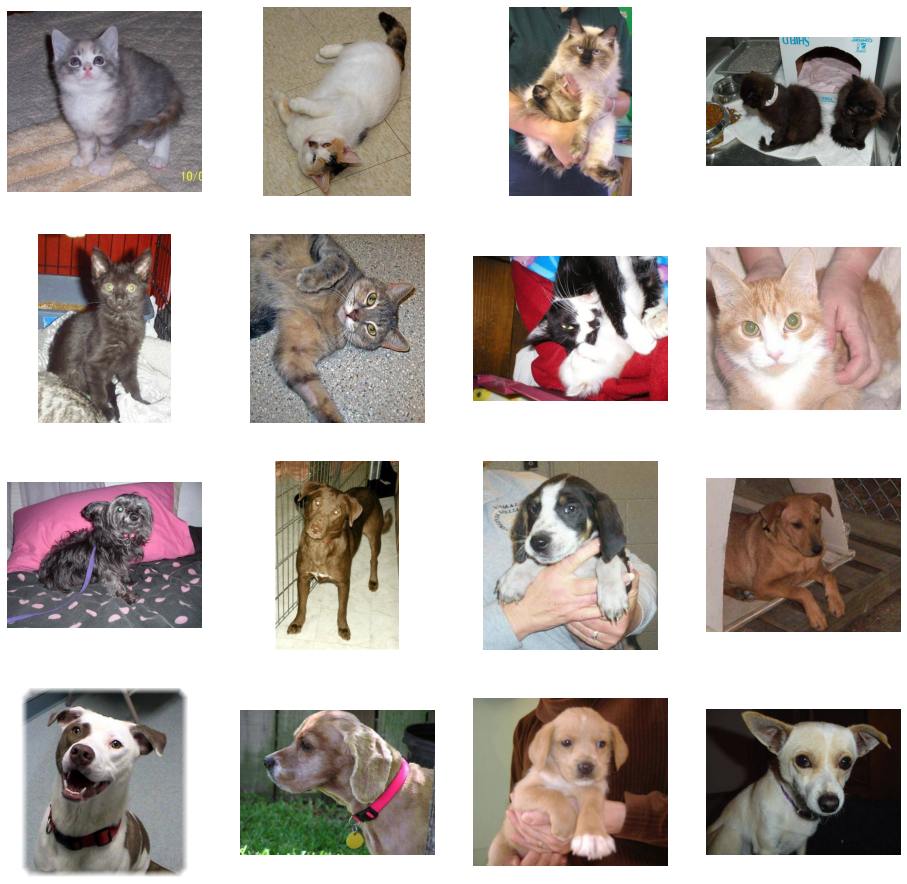

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
img_input = layers.Input(shape=(150, 150, 3))
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)

output = layers.Dense(1, activation='sigmoid')(x)

model = Model(img_input, output)
model.summary()

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0   

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150),  
        batch_size=20,
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
100/100 - 56s - loss: 0.8073 - acc: 0.5580 - val_loss: 0.6405 - val_acc: 0.6550
Epoch 2/15
100/100 - 54s - loss: 0.6100 - acc: 0.6735 - val_loss: 0.5550 - val_acc: 0.7270
Epoch 3/15
100/100 - 54s - loss: 0.5107 - acc: 0.7565 - val_loss: 0.5662 - val_acc: 0.7100
Epoch 4/15
100/100 - 54s - loss: 0.4365 - acc: 0.8145 - val_loss: 0.5942 - val_acc: 0.7020
Epoch 5/15
100/100 - 54s - loss: 0.3473 - acc: 0.8475 - val_loss: 0.5841 - val_acc: 0.7450
Epoch 6/15
100/100 - 54s - loss: 0.2630 - acc: 0.8865 - val_loss: 0.7582 - val_acc: 0.7180
Epoch 7/15
100/100 - 54s - loss: 0.2014 - acc: 0.9220 - val_loss: 0.7640 - val_acc: 0.7140
Epoch 8/15
100/100 - 54s - loss: 0.1395 - acc: 0.9440 - val_loss: 0.9718 - val_acc: 0.7060
Epoch 9/15
100/100 - 54s - loss: 0.0900 - acc: 0.9625 - val_loss: 1.0724 - val_acc: 0.7300
Epoch 10/15
100/100 - 54s - loss: 0.1186 - acc: 0.9690 - val_loss: 1.1557 - val_acc: 0.7110
Epoch 11/15
100/100 - 54s - loss: 0.0662 - acc: 0.9800 - val_loss: 1.3994 - val_acc: 0.71